In [ ]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

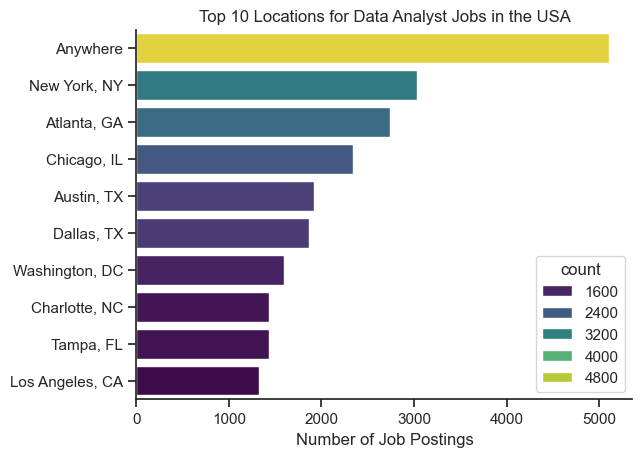

In [ ]:
df_DA_USA = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]
df_plot = df_DA_USA['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style="ticks")
sns.barplot(x='count', y='job_location', data=df_plot, hue='count', palette='viridis')
sns.despine()
plt.title('Top 10 Locations for Data Analyst Jobs in the USA')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()

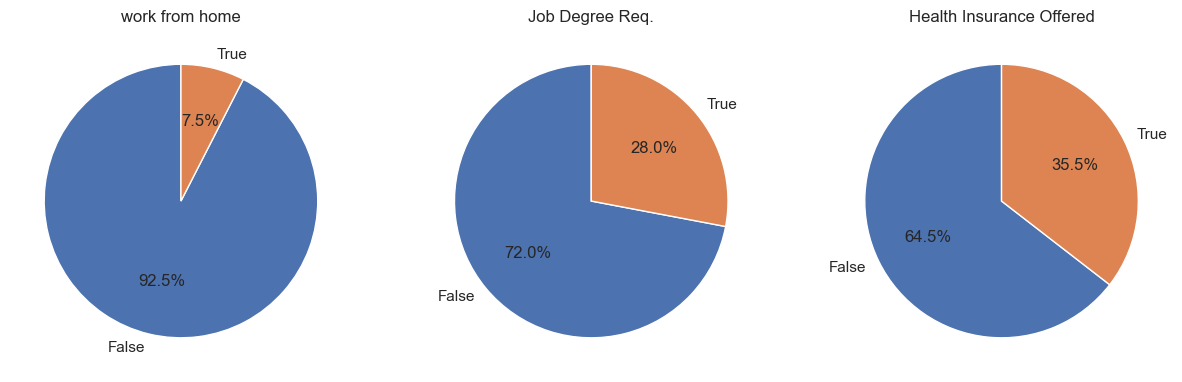

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)
dict_columns = {
    'job_work_from_home': 'work from home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_columns.items()):
    ax[i].pie(df_DA_USA[column].value_counts(), startangle = 90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
plt.show()

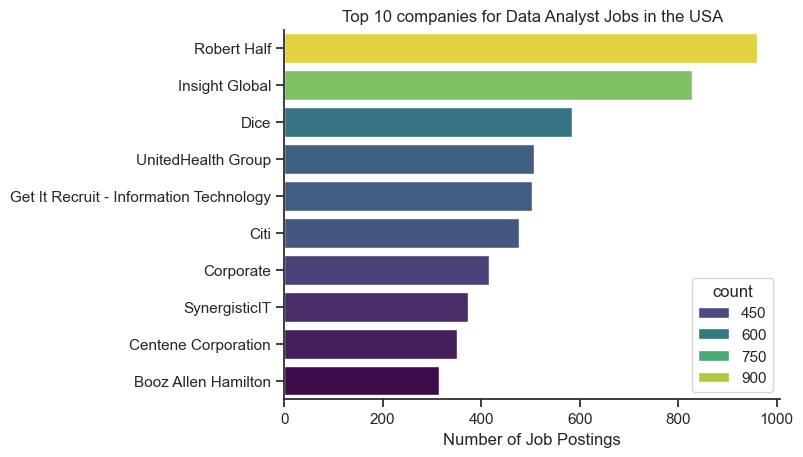

In [ ]:
df_plot = df_DA_USA['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style="ticks")
sns.barplot(x='count', y='company_name', data=df_plot, hue='count', palette='viridis')
sns.despine()
plt.title('Top 10 companies for Data Analyst Jobs in the USA')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()